### Task 2

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
%matplotlib inline

2. Load the dataset in Python (you can use pandas.read csv).

In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX



3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced,and which metric is more appropriate to use to evaluate the performance of your classifier.



In [3]:
classes=np.array(df['Drug'].unique())

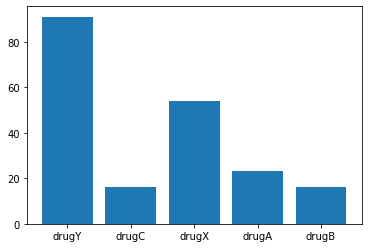

In [4]:
instances=[None] * len(classes)
index=0
for drug in classes:
    instances[index]=np.array(len(df['Drug'].loc[df['Drug']==drug]))
    index+=1
    
drugFig = plt.figure()
plt.bar(classes,instances)
drugFig.savefig('drug-distribution.pdf', dpi=drugFig.dpi)

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas.get dummies and pandas. Categorical to do this.

In [5]:

sex = pd.get_dummies(df['Sex'])
df_new = sex

df_new = pd.concat([df_new, df['Age']], axis=1)

bp = pd.get_dummies(df['BP'])
df_new = pd.concat([df_new, bp], axis=1)

chol = pd.get_dummies(df['Cholesterol'])
df_new = pd.concat([df_new, chol], axis=1)

df_new = pd.concat([df_new, df['Na_to_K']], axis=1)

df_new.head()

,F,M,Age,HIGH,LOW,NORMAL,HIGH,NORMAL,Na_to_K
0,1,0,23,1,0,0,1,0,25.355
1,0,1,47,0,1,0,1,0,13.093
2,0,1,47,0,1,0,1,0,10.114
3,1,0,28,0,0,1,1,0,7.798
4,1,0,61,0,1,0,1,0,18.043


5. Split the dataset using train test split using the default parameter values

In [6]:
X=df_new
y=df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=None)


6. Run 6 different classifiers:

(a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.


In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train)
nb_prediction = clf.predict(X_test)


(b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [8]:
dclf = DecisionTreeClassifier()
dclf.fit(X_train, y_train)
dt_prediction = dclf.predict(X_test)

(c) Top-DT: a better performing Decision Tree found using (GridSearchCV). The gridsearch will allow you to find the best combination of hyper-parameters, as determined by the evaluation function that you have determined in step (3) above. The hyper-parameters that you will experiment with are:
- criterion: gini or entropy
- max depth : 2 different values of your choice
- min samples split: 3 different values of your choice

In [9]:
parameters = {
              'criterion': ['entropy'],
              'max_depth': [2,4], 
              'min_samples_split': [3,4,5],
             }

grid_obj = GridSearchCV(DecisionTreeClassifier(), parameters)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)
t_dt_prediction = clf.predict(X_test)
clf.predict(X_test)

array(['drugY', 'drugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugX',
       'drugY', 'drugC', 'drugY', 'drugX', 'drugC', 'drugB', 'drugY',
       'drugY', 'drugB', 'drugY', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugY', 'drugY', 'drugX', 'drugA', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugA', 'drugA', 'drugY', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugY', 'drugA'], dtype=object)

(d) PER: a Perceptron (linear model.Perceptron), with default parameter values

In [10]:
clf = Perceptron()
clf.fit(X_train, y_train)
Perceptron()
per_prediction=clf.predict(X_test)

(e) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with 1 hidden layer of 100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters.

In [11]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', max_iter=3000)
mlp_clf.fit(X_train, y_train)
mlp_prediction=mlp_clf.predict(X_test)
mlp_prediction

array(['drugY', 'drugY', 'drugX', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugX'], dtype='<U5')

(f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need to experiment with the following parameter values:
- activation function: sigmoid, tanh, relu and identity
- 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers with 10 + 10 + 10
- solver: Adam and stochastic gradient descent

In [12]:
param_grid = {
    'hidden_layer_sizes': [(30,50), (10,10,10)],
    'activation': ['tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam'],
    'max_iter':[10000]
}
grid = GridSearchCV(MLPClassifier(), param_grid)
grid.fit(X_train, y_train)
t_mlp_prediction=grid.predict(X_test)

7. For each of the 6 classifier above, append the following information in a file called drugs-performance.txt:
(to make it easier for the TAs, make sure that your output for each sub-question below is clearly marked
in your output file, using the headings (a), (b) . .. )

(b) the confusion matrix

In [13]:
nb_cmatrix = confusion_matrix(y_test, nb_prediction)
dt_cmatrix = confusion_matrix(y_test, dt_prediction)
t_dt_cmatrix = confusion_matrix(y_test, t_dt_prediction)
per_cmatrix = confusion_matrix(y_test, per_prediction)
mlp_cmatrix = confusion_matrix(y_test, mlp_prediction)
t_mlp_cmatrix = confusion_matrix(y_test, t_mlp_prediction)
print(nb_cmatrix)
print(dt_cmatrix)
print(t_dt_cmatrix)
print(per_cmatrix)
print(mlp_cmatrix)
print(t_mlp_cmatrix)

[[8 0 0 0 0]
 [0 4 0 0 0]
 [0 0 3 0 0]
 [0 0 0 8 0]
 [4 1 0 3 9]]
[[ 8  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 17]]
[[ 8  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 17]]
[[0 0 0 8 0]
 [0 0 0 4 0]
 [0 0 0 2 1]
 [0 0 0 8 0]
 [0 0 0 9 8]]
[[ 0  0  0  5  3]
 [ 0  0  0  4  0]
 [ 0  0  0  2  1]
 [ 0  0  0  7  1]
 [ 0  0  0  0 17]]
[[ 8  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 17]]


(c) the precision, recall, and F1-measure for each class

In [14]:
nb_classificationReport = classification_report(y_test, nb_prediction, target_names=classes)
dt_classificationReport = classification_report(y_test, dt_prediction, target_names=classes)
t_dt_classificationReport = classification_report(y_test, t_dt_prediction, target_names=classes)
per_classificationReport = classification_report(y_test, per_prediction, target_names=classes)
mlp_classificationReport = classification_report(y_test, mlp_prediction, target_names=classes)
t_mlp_classificationReport = classification_report(y_test, t_mlp_prediction, target_names=classes)
print(nb_classificationReport)
print(dt_classificationReport)
print(t_dt_classificationReport)
print(per_classificationReport)
print(mlp_classificationReport)
print(t_mlp_classificationReport)

              precision    recall  f1-score   support

       drugY       0.67      1.00      0.80         8
       drugC       0.80      1.00      0.89         4
       drugX       1.00      1.00      1.00         3
       drugA       0.73      1.00      0.84         8
       drugB       1.00      0.53      0.69        17

    accuracy                           0.80        40
   macro avg       0.84      0.91      0.84        40
weighted avg       0.86      0.80      0.79        40

              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         8
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00         3
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

              precisio

C:\Users\wi151\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wi151\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wi151\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

(d) the accuracy, macro-average F1 and weighted-average F1 of the model

In [15]:
nb_accuracyScore = accuracy_score(y_test, nb_prediction)
nb_macroF1Score = f1_score(y_test, nb_prediction, average='macro')
nb_weightedF1Score = f1_score(y_test, nb_prediction, average='weighted')
print('NB:',nb_accuracyScore, nb_macroF1Score, nb_weightedF1Score)

dt_accuracyScore = accuracy_score(y_test, dt_prediction)
dt_macroF1Score = f1_score(y_test, dt_prediction, average='macro')
dt_weightedF1Score = f1_score(y_test, dt_prediction, average='weighted')
print('DT:', dt_accuracyScore, dt_macroF1Score, dt_weightedF1Score)

t_dt_accuracyScore = accuracy_score(y_test, t_dt_prediction)
t_dt_macroF1Score = f1_score(y_test, t_dt_prediction, average='macro')
t_dt_weightedF1Score = f1_score(y_test, t_dt_prediction, average='weighted')
print('Top-DT:',t_dt_accuracyScore, t_dt_macroF1Score, t_dt_weightedF1Score)

t_mlp_accuracyScore = accuracy_score(y_test, t_mlp_prediction)
t_mlp_macroF1Score = f1_score(y_test, t_mlp_prediction, average='macro')
t_mlp_weightedF1Score = f1_score(y_test, t_mlp_prediction, average='weighted')
print('Top-MLP:', t_mlp_accuracyScore, t_mlp_macroF1Score, t_mlp_weightedF1Score)

per_accuracyScore = accuracy_score(y_test, per_prediction)
per_macroF1Score = f1_score(y_test, per_prediction, average='macro')
per_weightedF1Score = f1_score(y_test, per_prediction, average='weighted')
print('PER:',per_accuracyScore, per_macroF1Score, per_weightedF1Score)

mlp_accuracyScore = accuracy_score(y_test, mlp_prediction)
mlp_macroF1Score = f1_score(y_test, mlp_prediction, average='macro')
mlp_weightedF1Score = f1_score(y_test, mlp_prediction, average='weighted')
print('MLP:', mlp_accuracyScore, mlp_macroF1Score, mlp_weightedF1Score)

NB: 0.8 0.8446603688708952 0.7865407107512371
DT: 1.0 1.0 1.0
Top-DT: 1.0 1.0 1.0
Top-MLP: 1.0 1.0 1.0
PER: 0.4 0.20512820512820512 0.34358974358974353
MLP: 0.6 0.28205128205128205 0.4782051282051283


Write to `drug-performance.txt`

In [27]:
f = open('drug-performance.txt', 'w')
f.write('Gaussian Naive Bayes Classifier with default paramaters\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(pd.DataFrame(nb_cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(nb_classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(nb_accuracyScore) + '\n')
f.write('macro average f1: ' + str(nb_macroF1Score) + '\n')
f.write('weighted average: ' + str(nb_weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n\n')
f.write('Decision Tree with default parameters\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(pd.DataFrame(dt_cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(dt_classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(dt_accuracyScore) + '\n')
f.write('macro average f1: ' + str(dt_macroF1Score) + '\n')
f.write('weighted average: ' + str(dt_weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n\n')
f.write('Top-DT with the following parameters\n')
f.write('- criterion: entropy\n')
f.write('- max depth : [2,4]\n')
f.write('- min samples split: [3,4,5]\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(pd.DataFrame(t_dt_cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(t_dt_classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(t_dt_accuracyScore) + '\n')
f.write('macro average f1: ' + str(t_dt_macroF1Score) + '\n')
f.write('weighted average: ' + str(t_dt_weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n\n')
f.write('Perceptron with default parameter values\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(pd.DataFrame(per_cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(per_classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(per_accuracyScore) + '\n')
f.write('macro average f1: ' + str(per_macroF1Score) + '\n')
f.write('weighted average: ' + str(per_weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n\n')
f.write('Multi-Layered Perceptron \n- 1 hidden layer of 100 neurons \n- logistic\n- stochastic gradient descent\n- default values for the rest of the parameters.\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(pd.DataFrame(mlp_cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(mlp_classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(mlp_accuracyScore) + '\n')
f.write('macro average f1: ' + str(mlp_macroF1Score) + '\n')
f.write('weighted average: ' + str(mlp_weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n\n')
f.write('Top-MLP\n')
f.write('- activation function: sigmoid, tanh, relu and identity\n')
f.write('- 2 network architectures of your choice: 2 hidden layers with 30 + 50 nodes, \n- 3 hidden layers with 10 + 10 + 10\n')
f.write('- solver: Adam and stochastic gradient descent\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(pd.DataFrame(t_mlp_cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(t_mlp_classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(t_mlp_accuracyScore) + '\n')
f.write('macro average f1: ' + str(t_mlp_macroF1Score) + '\n')
f.write('weighted average: ' + str(t_mlp_weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')


82